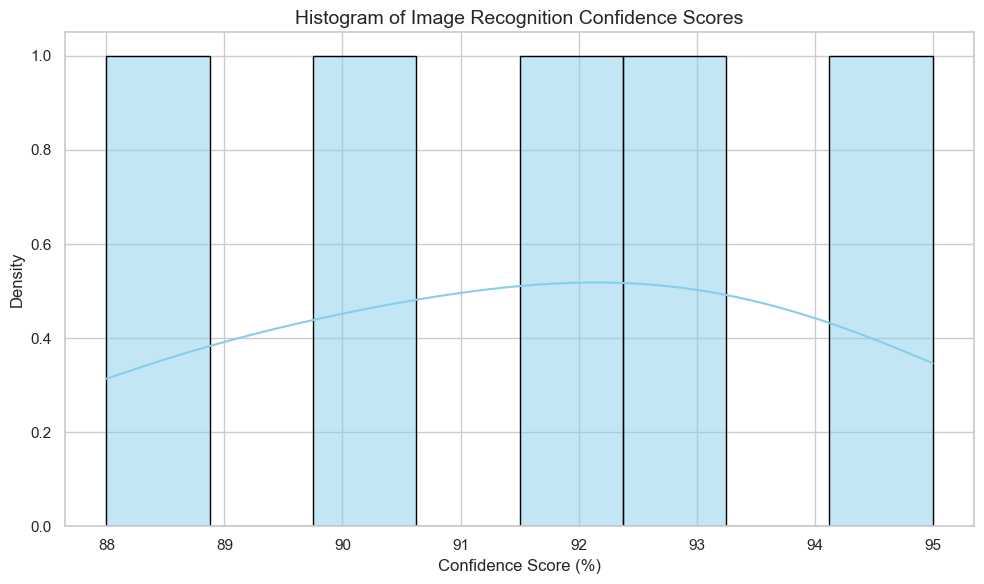


Simulating real-time confidence plotting...



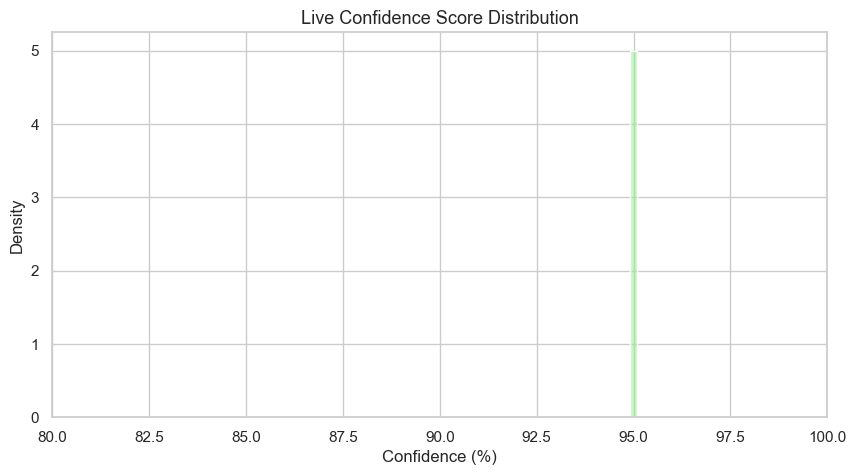

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>


🔎 Final Compliance Report:

| plate_number   | plate_format_valid   |   confidence_score | registration_valid   | insurance_valid   | pollution_valid   | status        | final_flag   |
|:---------------|:---------------------|-------------------:|:---------------------|:------------------|:------------------|:--------------|:-------------|
| TN22AB1234     | True                 |                 95 | True                 | True              | True              | COMPLIANT     | Green Flag   |
| MH12FAKE1234   | False                |                 90 | True                 | True              | True              | FAKE PLATE    | Reportable   |
| DL8CAF9999     | False                |                 92 | True                 | False             | True              | FAKE PLATE    | Reportable   |
| KA05XY4321     | True                 |                 88 | True                 | True              | False             | NON-COMPLIANT | Reportable   |
| UP32ZZ9999     | True      

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import re

# ========================
# Config + Sample Data Path
# ========================
DATA_FILE = "vehicle_data.csv"  # your detection results CSV
FAKE_PLATES = {"MH12FAKE1234", "DL8CAF9999"}
PLATE_REGEX = re.compile(r'^[A-Z]{2}\d{2}[A-Z]{1,2}\d{4}$')

# ========================
# Functions
# ========================
def is_fake_plate(plate): return plate in FAKE_PLATES
def is_plate_format_valid(plate): return bool(PLATE_REGEX.match(plate))

def compute_status(row):
    plate = row["plate_number"]
    if is_fake_plate(plate): return "FAKE PLATE"
    if not is_plate_format_valid(plate): return "INVALID FORMAT"
    if not (row["registration_valid"] and row["insurance_valid"] and row["pollution_valid"]):
        return "NON-COMPLIANT"
    return "COMPLIANT"

def compute_flag(status): return "Green Flag" if status == "COMPLIANT" else "Reportable"

# ========================
# Load and process dataset
# ========================
df = pd.read_csv(DATA_FILE)
df["confidence_score"] = df["confidence_score"].astype(float)
for col in ["registration_valid", "insurance_valid", "pollution_valid"]:
    df[col] = df[col].astype(bool)

# Add computed columns
df["plate_format_valid"] = df["plate_number"].apply(is_plate_format_valid)
df["status"] = df.apply(compute_status, axis=1)
df["final_flag"] = df["status"].map(compute_flag)

# ========================
# 1️⃣ Histogram with KDE
# ========================
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df["confidence_score"], bins=8, kde=True, color="skyblue", edgecolor="black")
plt.title("Histogram of Image Recognition Confidence Scores", fontsize=14)
plt.xlabel("Confidence Score (%)")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("histogram_confidence.png")
plt.show()

# ========================
# 2️⃣ Real-Time Plotting
# ========================
plt.ion()
fig, ax = plt.subplots(figsize=(10, 5))
conf_scores = []

print("\nSimulating real-time confidence plotting...\n")
for score in df["confidence_score"]:
    conf_scores.append(score)
    ax.clear()
    sns.histplot(conf_scores, bins=5, kde=True, color="lightgreen", ax=ax, edgecolor="white", stat="density")
    ax.set_title("Live Confidence Score Distribution", fontsize=13)
    ax.set_xlabel("Confidence (%)")
    ax.set_xlim(80, 100)
    plt.draw()
    plt.pause(0.5)
plt.ioff()
plt.savefig("live_plot.png")
plt.show()

# ========================
# 3️⃣ Final Output Table
# ========================
final_df = df[[
    "plate_number", "plate_format_valid", "confidence_score",
    "registration_valid", "insurance_valid", "pollution_valid",
    "status", "final_flag"
]]

print("\n🔎 Final Compliance Report:\n")
print(final_df.to_markdown(index=False))
final_df.to_csv("vehicle_report.csv", index=False)
print("\n✅ Saved: vehicle_report.csv, histogram_confidence.png, live_plot.png")


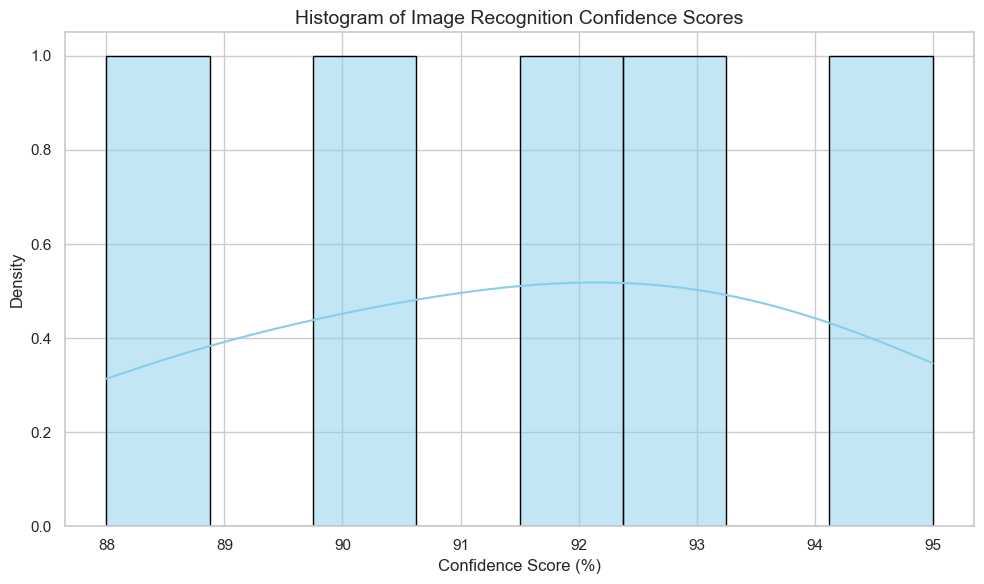


Simulating real-time confidence plotting...



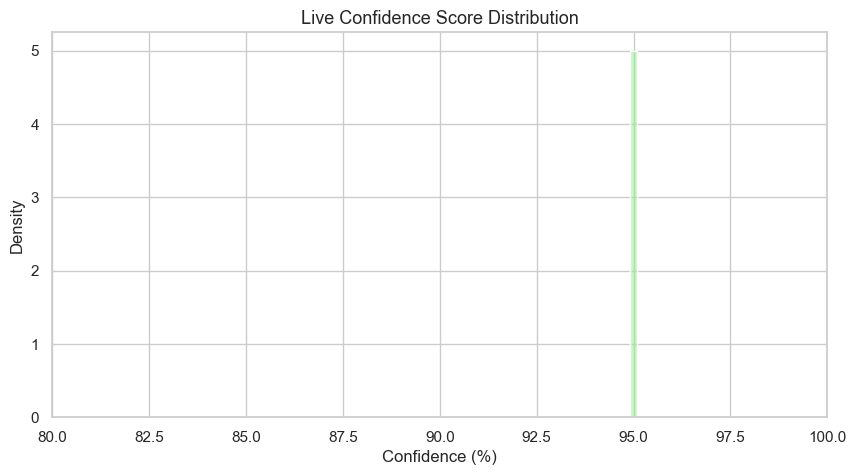

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>


🔎 Final Compliance Report:

| plate_number   | plate_format_valid   |   confidence_score | registration_valid   | insurance_valid   | pollution_valid   | status        | final_flag   |
|:---------------|:---------------------|-------------------:|:---------------------|:------------------|:------------------|:--------------|:-------------|
| TN22AB1234     | True                 |                 95 | True                 | True              | True              | COMPLIANT     | Green Flag   |
| MH12FAKE1234   | False                |                 90 | True                 | True              | True              | FAKE PLATE    | Reportable   |
| DL8CAF9999     | False                |                 92 | True                 | False             | True              | FAKE PLATE    | Reportable   |
| KA05XY4321     | True                 |                 88 | True                 | True              | False             | NON-COMPLIANT | Reportable   |
| UP32ZZ9999     | True      

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import re

# ========================
# Config + Sample Data Path
# ========================
DATA_FILE = "vehicle_data.csv"  # your detection results CSV
FAKE_PLATES = {"MH12FAKE1234", "DL8CAF9999"}
PLATE_REGEX = re.compile(r'^[A-Z]{2}\d{2}[A-Z]{1,2}\d{4}$')

# ========================
# Functions
# ========================
def is_fake_plate(plate): return plate in FAKE_PLATES
def is_plate_format_valid(plate): return bool(PLATE_REGEX.match(plate))

def compute_status(row):
    plate = row["plate_number"]
    if is_fake_plate(plate): return "FAKE PLATE"
    if not is_plate_format_valid(plate): return "INVALID FORMAT"
    if not (row["registration_valid"] and row["insurance_valid"] and row["pollution_valid"]):
        return "NON-COMPLIANT"
    return "COMPLIANT"

def compute_flag(status): return "Green Flag" if status == "COMPLIANT" else "Reportable"

# ========================
# Load and process dataset
# ========================
df = pd.read_csv(DATA_FILE)
df["confidence_score"] = df["confidence_score"].astype(float)
for col in ["registration_valid", "insurance_valid", "pollution_valid"]:
    df[col] = df[col].astype(bool)

# Add computed columns
df["plate_format_valid"] = df["plate_number"].apply(is_plate_format_valid)
df["status"] = df.apply(compute_status, axis=1)
df["final_flag"] = df["status"].map(compute_flag)

# ========================
# 1️⃣ Histogram with KDE
# ========================
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df["confidence_score"], bins=8, kde=True, color="skyblue", edgecolor="black")
plt.title("Histogram of Image Recognition Confidence Scores", fontsize=14)
plt.xlabel("Confidence Score (%)")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("histogram_confidence.png")
plt.show()

# ========================
# 2️⃣ Real-Time Plotting
# ========================
plt.ion()
fig, ax = plt.subplots(figsize=(10, 5))
conf_scores = []

print("\nSimulating real-time confidence plotting...\n")
for score in df["confidence_score"]:
    conf_scores.append(score)
    ax.clear()
    sns.histplot(conf_scores, bins=5, kde=True, color="lightgreen", ax=ax, edgecolor="white", stat="density")
    ax.set_title("Live Confidence Score Distribution", fontsize=13)
    ax.set_xlabel("Confidence (%)")
    ax.set_xlim(80, 100)
    plt.draw()
    plt.pause(0.5)
plt.ioff()
plt.savefig("live_plot.png")
plt.show()

# ========================
# 3️⃣ Final Output Table
# ========================
final_df = df[[
    "plate_number", "plate_format_valid", "confidence_score",
    "registration_valid", "insurance_valid", "pollution_valid",
    "status", "final_flag"
]]

print("\n🔎 Final Compliance Report:\n")
print(final_df.to_markdown(index=False))
final_df.to_csv("vehicle_report.csv", index=False)
print("\n✅ Saved: vehicle_report.csv, histogram_confidence.png, live_plot.png")
